In [1]:
import pandas as pd
import numpy as np

In [57]:
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
import neattext.functions as nfx

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
data=pd.read_csv('emotion_raw_dataset.csv')

In [16]:
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [17]:
data.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

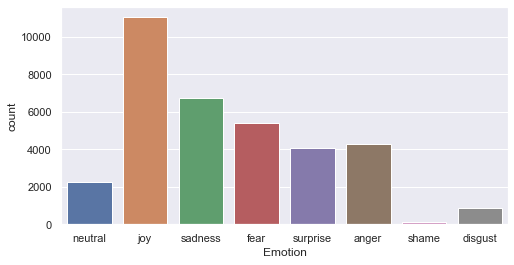

In [18]:
sn.set(rc={"figure.figsize":(8, 4)})
sn.countplot(x='Emotion',data=data)

In [21]:
#Cleaning dataset
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [40]:
data['Cleaned_Text']=data.Text.apply(nfx.remove_userhandles)
#data['Cleaned_Text']=data.Cleaned_Text.apply(nfx.remove_stopwords)
data['Cleaned_Text']=data.Cleaned_Text.apply(nfx.remove_special_characters)
data['Cleaned_Text']=data.Cleaned_Text.apply(nfx.remove_urls)
data['Cleaned_Text']=data.Cleaned_Text.apply(nfx.remove_numbers)
data['Cleaned_Text']=data.Cleaned_Text.apply(nfx.remove_punctuations)

In [41]:
data.head(5)

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,Why
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz for u babe naamazed nga ...


In [42]:
data[data['Cleaned_Text']==""]

,Emotion,Text,Cleaned_Text


In [43]:
X=data['Cleaned_Text']
y=data['Emotion']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
#Build pipline for models
from sklearn.pipeline import Pipeline

In [46]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])
pipe_mnb=Pipeline(steps=[('cv',CountVectorizer()),('mnb',MultinomialNB())])


In [47]:
pipe_lr.fit(x_train,y_train)


Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [49]:
pipe_mnb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('mnb', MultinomialNB())])

In [50]:
pipe_lr.score(x_test,y_test)

0.6334546848055183

In [51]:
pipe_mnb.score(x_test,y_test)

0.5685955163824488

In [52]:
test_case="This book is so interesting"

In [53]:
test_case_pred=pipe_lr.predict([test_case])
print(test_case_pred)

['joy']


In [54]:
pipe_lr.predict_proba([test_case])

array([[3.12083273e-02, 1.91337884e-02, 1.42830410e-02, 7.57963028e-01,
        6.92093089e-02, 5.74059828e-02, 4.10525007e-04, 5.03859990e-02]])

In [55]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [56]:
cm=confusion_matrix(y_test, pipe_lr.predict(y_test))
print(cm)

[[1283    0    0    0    0    0    0    0]
 [   0    0    0    0  292    0    0    0]
 [   0    0 1645    0    0    0    0    0]
 [   0    0    0 3311    0    0    0    0]
 [   0    0    0    0  675    0    0    0]
 [   0    0    0    0    0 2015    0    0]
 [   0    0    0    0   36    0    0    0]
 [   0    0    0    0    0    0    0 1181]]


[Text(0, 0.5, 'anger'),
 Text(0, 1.5, 'disgust'),
 Text(0, 2.5, 'fear'),
 Text(0, 3.5, 'joy'),
 Text(0, 4.5, 'neutral'),
 Text(0, 5.5, 'sadness'),
 Text(0, 6.5, 'shame'),
 Text(0, 7.5, 'surprise')]

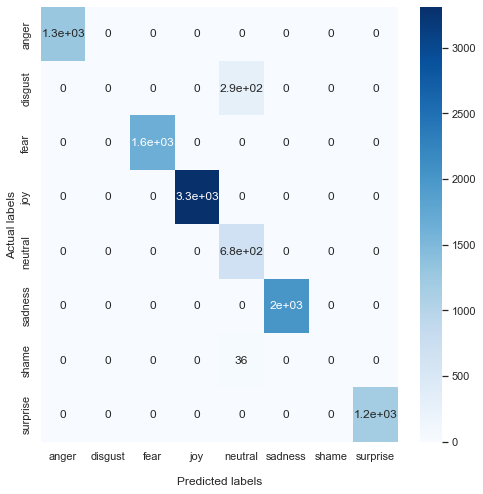

In [60]:
sn.set(rc={"figure.figsize":(8, 8)})

ax = sn.heatmap(cm, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted labels')
ax.set_ylabel('Actual labels')

ax.xaxis.set_ticklabels(pipe_lr.classes_)
ax.yaxis.set_ticklabels(pipe_lr.classes_)

#plt.show()

In [61]:
cl=classification_report(y_test, pipe_lr.predict(y_test))
print(cl)

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      1283
     disgust       0.00      0.00      0.00       292
        fear       1.00      1.00      1.00      1645
         joy       1.00      1.00      1.00      3311
     neutral       0.67      1.00      0.80       675
     sadness       1.00      1.00      1.00      2015
       shame       0.00      0.00      0.00        36
    surprise       1.00      1.00      1.00      1181

    accuracy                           0.97     10438
   macro avg       0.71      0.75      0.73     10438
weighted avg       0.95      0.97      0.96     10438



c:\Users\91890\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91890\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91890\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [63]:
#Save model and pipeline
import joblib #serialization
pipeline_file=open("emotion_classifier_pipe_lr_21_july_2022.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()